In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image # # the Image function from the IPython.display module. This module provides a number of functions for displaying different types of content in IPython notebooks, including images.

#### Table of Contents

#### Introduction

#### Metrics for imbalanced data
1. 2.1 Failure of Classification Accuracy for Imbalanced Class Distributions
2. 2.2 The most common metrics to use for imbalanced datasets
3. 2.3 Choosing metrics

#### Set-up
1. 3.1 Import Libraries
2. 3.2 Import Data
3. 3.3 Data Sets Characteristics
4. 3.4 Data imbalance check
5. 3.5 99,8% Accuracy score before implementing any model

#### Data pre-processing
1. 4.1 Dropping duplicated values
2.4.2 Why we shouldn't delete outliers in this case
3. 4.2.1 Checking for outliers
4. 4.2.2 Inter Quartile Range (IQR)
5. 4.2.3 Conclusion - very important!

#### Train test split - you could have been splitting your dataset all wrong
1. 5.1 Stratified splitting
2. 5.2 Oversample/undersample before or after splitting data?

#### Feature scaling
#### Baseline (no oversampling)
1. 7.1 Cross-validation
2. 7.2 Stratified K-Fold CV (Cross-Validation)
3. 7.3 Oversample/undersample and Cross Validation
4. 7.4 Optimising for Recall
5. 7.5 When is Precision more important over Recall?
6. 7.6 Hyperparameter Tuning Using GridSearchCV

#### Random Resampling Imbalanced Datasets
1. 8.1 Random Oversampling
2. 8.1.1 Imbalanced-Learn Pipeline
3. 8.1.2 Training model
4. 8.1.3 GridSearchCV
5. 8.1.4 Confusion matrix and scores
6. 8.2 Random Undersampling Imbalanced Datasets

#### SMOTE (Synthetic Minority Oversampling Technique)
1. 9.1 Training model
2. 9.2 GridSearchCV
3. 9.3 Confusion matrix and scores

#### Undersampling using Tomek Links
#### Combining SMOTE and Tomek Links
1. 11.1 Training model
2. 11.2 GridSearchCV
3. 11.3 Confusion matrix and scores

#### Class weights in the models
1. 12.1 Training model
2. 12.2 GridSearchCV
3. 12.3 Confusion matrix and scores

#### Performance comparison
1. 13.1 Summary

#### Other Metrics
1. 14.1 AUC-ROC Curve
2. 14.2 Precision-Recall Curve (PR curve)
3. My other notebooks recommendations

### 3. Set-up
#### 3. 1 Import Libraries


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter # # The code you provided imports the Counter class from the collections module. The Counter class is a container that stores elements as dictionary keys, and their counts are stored as dictionary values. This means that the Counter class can be used to count the number of occurrences of each element in a sequence.

### 1. Introduction
Imbalanced data refers to a situation, primarily in classification machine learning, where one target class represents a significant proportion of observations. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

Class Imbalance appear in many domains, including:

1. Fraud detection (the vast majority of the transactions will be in the "Not-Fraud” class)
2. Disease screening (the vast majority will be healthy)
3. Subscription churn (the vast majority of customers stay with the service - the “No-Churn” class)
4. Ad Serving (click prediction datasets don’t have a high clickthrough rate)
There are several approaches to solving class imbalance problem before starting classification, such as:

1. More samples from the minority class(es) should be acquired from the knowledge domain.

2. Changing the loss function to give the failing minority class a higher cost.

3. Oversampling the minority class.

4. Undersampling the majority class.

5. Any combination of previous approaches.

Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete or merge examples in the majority class. Oversampling is the most often used approach (but not necessarily the best).



### 2. Metrics for imbalanced data
#### 2. 1 Failure of Classification Accuracy for Imbalanced Class Distributions
Classification accuracy is a metric that summarizes the performance of a classification model as the number of correct predictions divided by the total number of predictions.

Accuracy = Correct Predictions / Total Predictions

Achieving 90 percent classification accuracy, or even 99 percent classification accuracy, may be trivial on an imbalanced classification problem. Consider the case of an imbalanced dataset with a 1:100 class imbalance. Blind guess will give us a 99% accuracy score (by betting on majority class).

The rule of thumb is: accuracy never helps in imbalanced dataset.

#### 2.2 The most common metrics to use for imbalanced datasets
The most common metrics to use for imbalanced datasets are:

- F1 score
- Precision
- Recall
- AUC score (AUC ROC)
- Average precision score (AP)
- G-Mean
It is good practice to track multiple metrics when developing a machine learning model as each highlights different aspects of model performance.

#### 2.3 Choosing metrics
Are you predicting probabilities?

- Do you need class labels?
1. Is the positive class more important?
2. Use Precision-Recall AUC

- Are both classes important?
1. Use ROC AUC
2. Do you need probabilities?
3. Use Brier Score and Brier Skill Score

- Are you predicting class labels?

1. Is the positive class more important?
2. Are False Negatives and False Positives Equally Important?
3. Use F1-Measure
4. Are False Negatives More Important?
5. Use F2-Measure
6. Are False Positives More Important?
7. Use F0.5-Measure
8. Are both classes important?
9. Do you have < 80%-90% Examples for the Majority Class?
10. Use Accuracy
11. Do you have > 80%-90% Examples for the Majority Class?
12. Use G-Mean

### 3.2 Import Data

In [53]:
try:
    raw_df = pd.read_csv("C:\\Users\\mahen\\Downloads\\creditcard.csv")
except:
    raw_df = pd.read_csv('creditcard.csv')

The credit card fraud dataset contains the following columns:

1. Time: The time in seconds elapsed between each transaction and the first transaction in the dataset.
2. Amount: The transaction amount.
3. Class: The target variable, which indicates whether the transaction is fraudulent (1) or not (0).
4. V1-V28: These columns contain the principal components obtained with PCA, which are the result of a dimensionality reduction technique that was applied to the original features in order to protect privacy. The original features are not available to the public.
5. The V1-V28 columns are the most important columns for credit card fraud detection. They contain information about the transactions that can be used to identify fraudulent transactions. For example, V1-V28 may contain information about the merchant, the location of the transaction, the type of card used, and the time of day the transaction occurred.

6. The Time and Amount columns are also important, but they are not as important as the V1-V28 columns. The Time column can be used to identify transactions that occur in a short period of time, which may be indicative of fraud. The Amount column can be used to identify transactions that are unusually large or small, which may also be indicative of fraud.

7. The Class column is the target variable, which is the value that we are trying to predict. The Class column indicates whether the transaction is fraudulent (1) or not (0). The goal of credit card fraud detection is to predict the Class column as accurately as possible.

##### Before jumping into classification problem statment we need to check which type classification problem statement we are dealing with based on the target feature ,this dataset is imbalanced data for target feature beacuse mostly there are normal transactions ,fradu transctions are less even if we predict the feature outcomes by a trained model it wont be accurate because majority class is normal transactions so model get to know that majority class is normal transactions so it shows favour to that  majority class while we pass the fetature data into model it do return the normal transaction as output if we predict



### DataSet Characteristics

#### Context

1. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content

1. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

2. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### 3.4 Data imbalance check

In [54]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

observation
1. By this we can say our target feature is imbalance because in the target feature majority of them are Genuine transactions are  and minority  them are fraud transactions so for this we use imbalance classification model

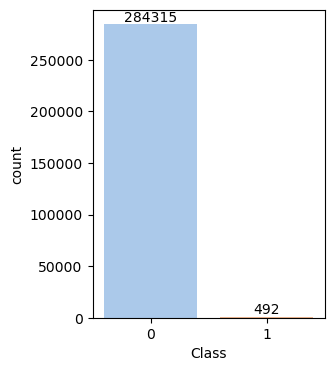

In [55]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

observation
1. In the Target feature
1. there are 284315 genuine transactions are there 
2. there are 492 fraud tranactions are there


In [56]:
print('Genuine:', round(raw_df['Class'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['Class'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Genuine: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


### 3.5 99.8% Accuracy score before implementing any model

Don't use accuracy score as a metric with imbalanced datasets - it will be usually high and misleading. In this dataset:

we have 99.8% of Genuine transactions and only 0.173% (492) of fraud transactions;

whis means that a blind guess (bet on Genuine) would give us accuracy of 99.8%

### 4. Data pre-processing
The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) except for 'time' and 'Amount'.

For PCA features need to be previously scaled so we can assume that they are (except for 'time' and 'Amount').

### 4.1 Dropping duplicated values

In [57]:
df = raw_df.copy() # # The code you provided first creates a copy of the DataFrame df and assigns it to the variable df1. This is important because we want to make sure that we are not modifying the original DataFrame.

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100) # # This prints 100 asterisks to separate the output from the code.


Duplicated values dropped succesfully
****************************************************************************************************


In [58]:
df = df.drop('Time', axis=1)

### 4.2 Why we shouldn't delete outliers in this case

#### 4.2.1 Checking for outliers

In [59]:
numeric_columns = (list(df.loc[:, 'V1':'Amount'])) # so here we are selecting only the numeric columns 


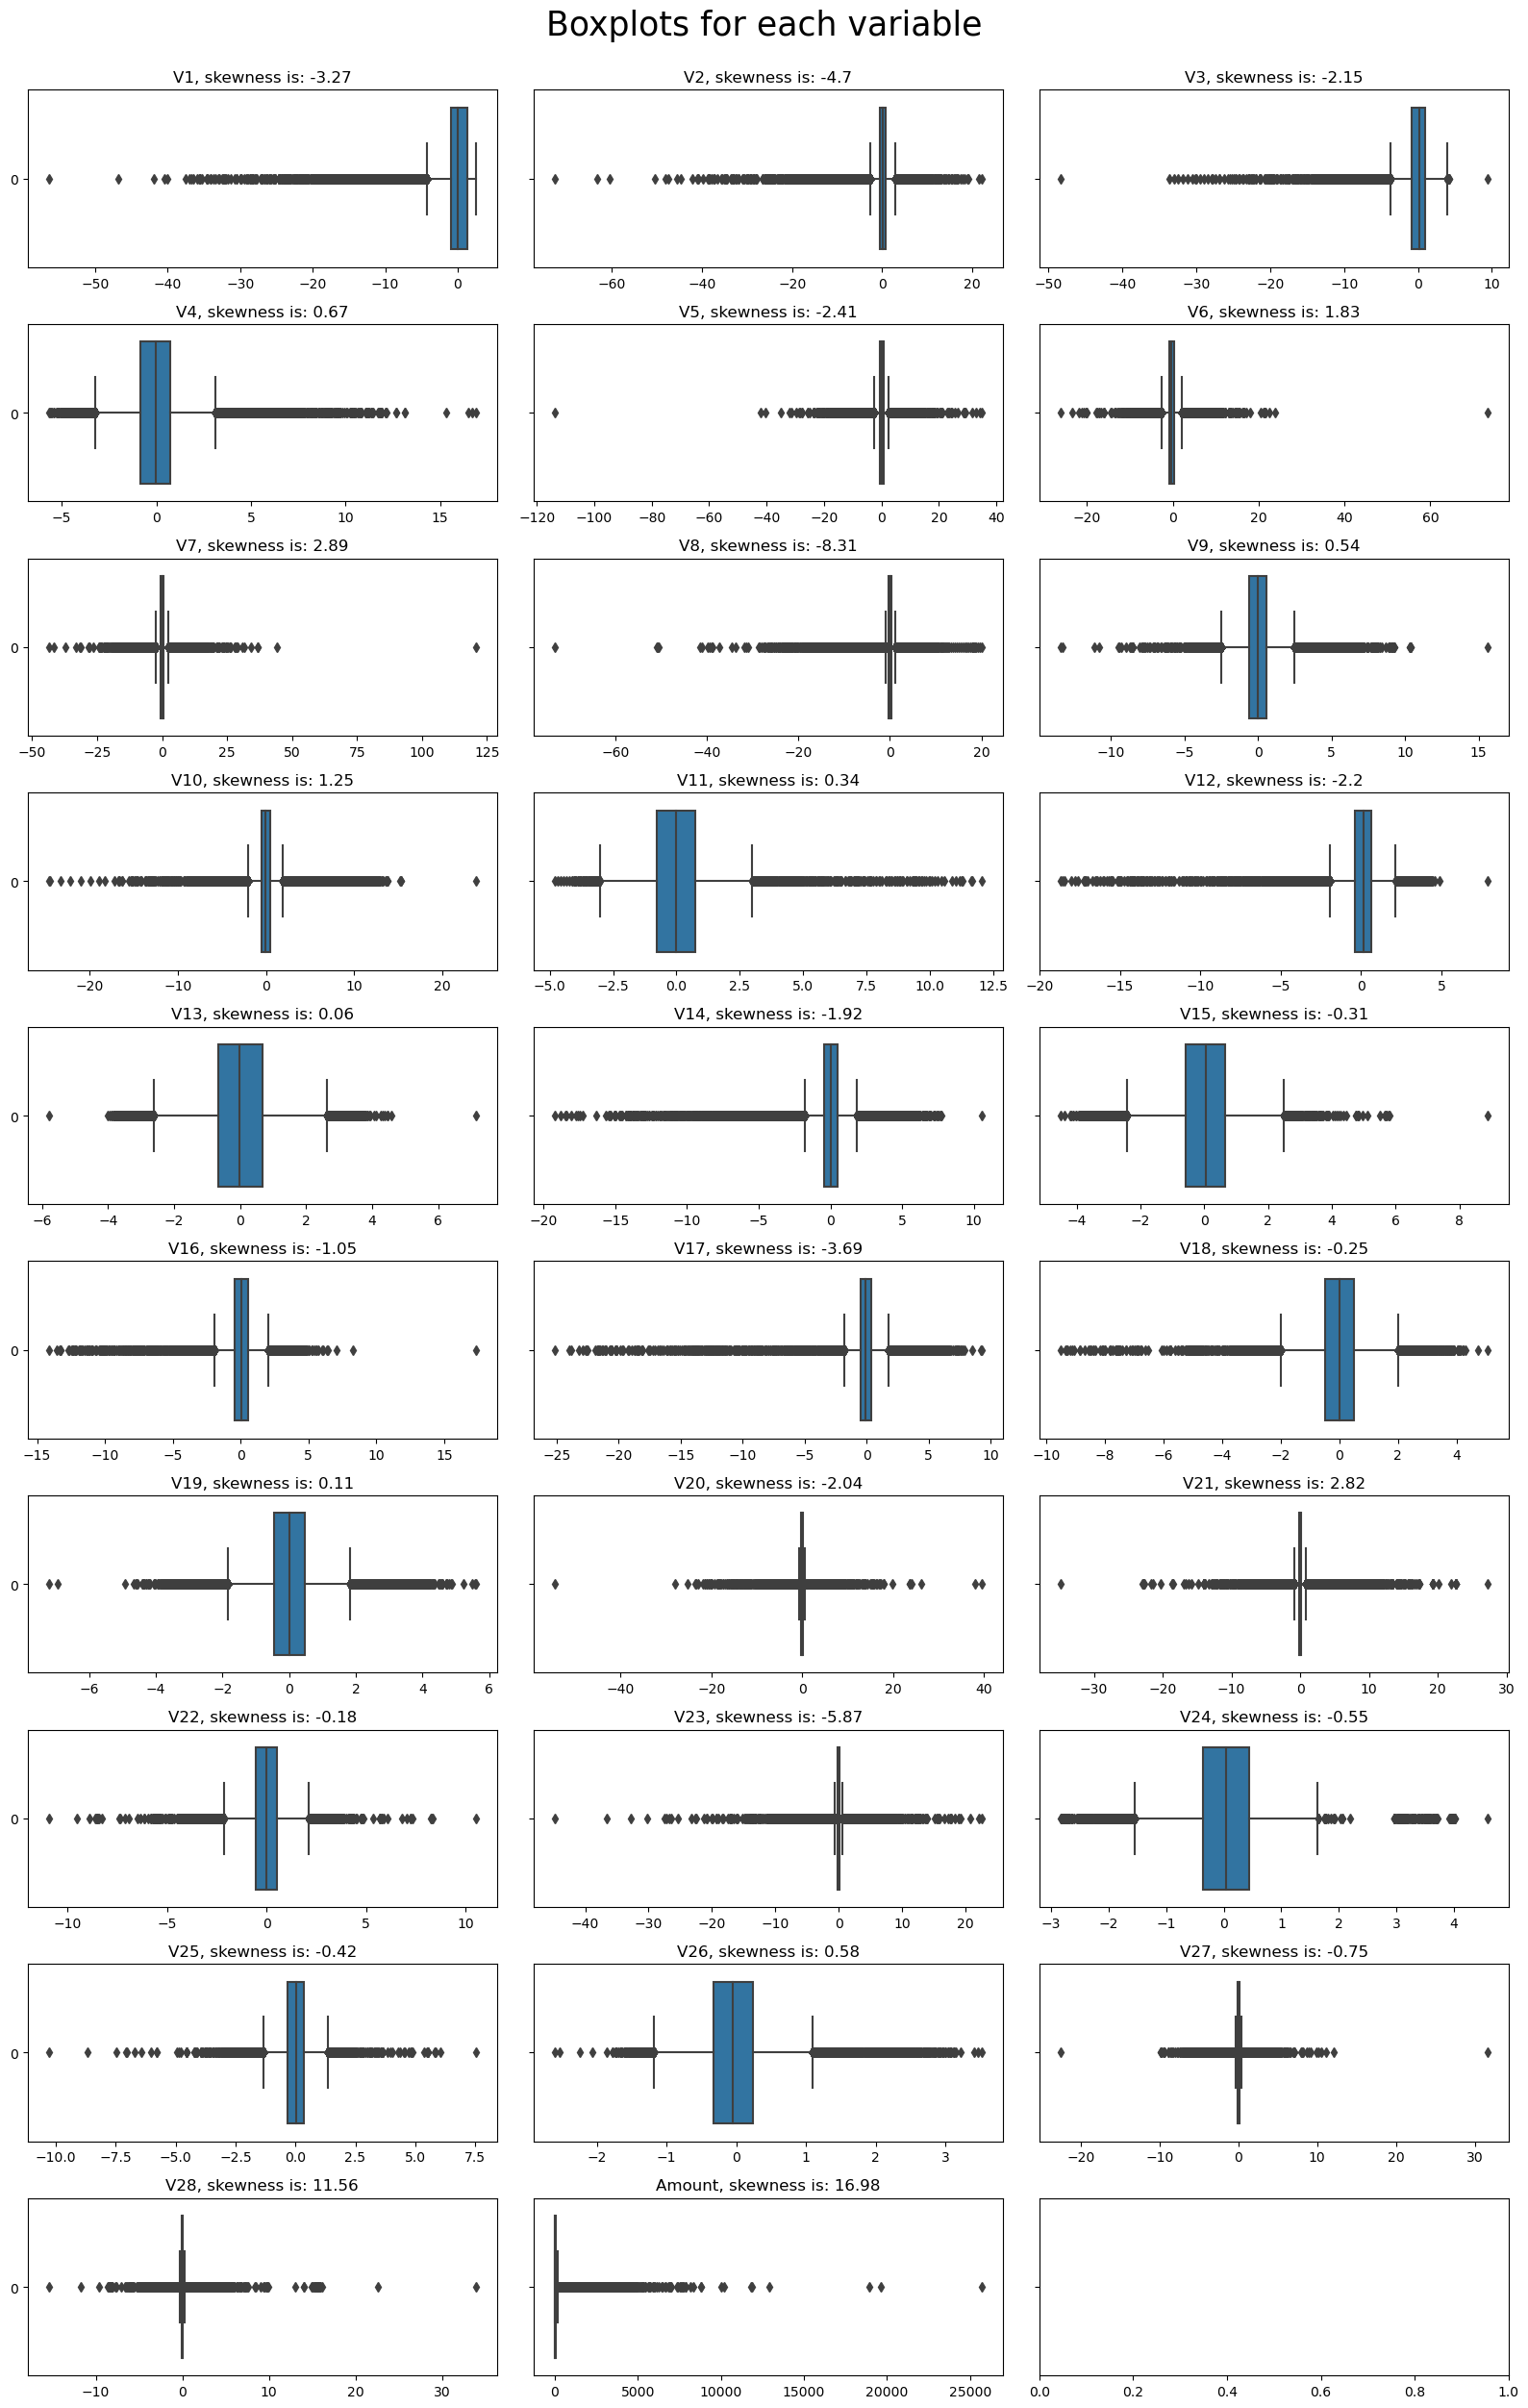

In [60]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

### 4.2.2 Inter Quartile Range (IQR)

We have a significant problems with outliers:

 . huge outliers;

 . higly skeved data;

 . a lot of outliers.

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

In [61]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)   # # The first line, outlier_list = Counter(outlier_list), converts the outlier_list list to a dictionary, where the keys are the indices of the outliers and the values are the number of times each outlier appears in the list. The second line, multiple_outliers = list( k for k, v in outlier_list.items() if v > n ), creates a list of the indices of the outliers that appear more than n times in the outlier_list list. Let's break it down step-by-step: The Counter() function counts the number of times each element appears in a list. In this case, the list is outlier_list, which contains the indices of the outliers. The items() method returns a list of tuples, where each tuple contains the key and value of a dictionary. In this case, the dictionary is outlier_list, and the tuples contain the index of an outlier and the number of times it appears in the list. The if statement checks if the value of each tuple is greater than n. If it is, the index of the outlier is added to the multiple_outliers list. The multiple_outliers list will contain the indices of the outliers that appear more than n times in the dataset. This information can be used to identify observations that contain multiple outliers, which may require further investigation.           
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )# # here "n" means In the code you provided, n is the number of outliers that are considered to be a multiple outlier. For example, if n is set to 2, then any observation that contains more than 2 outliers will be considered a multiple outlier. The n parameter can be used to control the sensitivity of the outlier detection algorithm. A lower value of n will result in more observations being classified as multiple outliers, while a higher value of n will result in fewer observations being classified as multiple outliers
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers


In [62]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31685


### 4.2.3 Conclusion - very important!

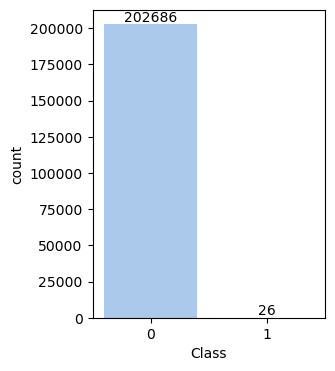

In [63]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

We stayed with only 26 fraud transactions in entire data frame!

We deleted almost all fraud transactions from a dataframe!

### 5. Train test split - you could have been splitting your dataset all wrong

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.

In [64]:
X = df.drop('Class', axis=1)
y = df['Class']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

### 5.2 Oversample/undersample before or after splitting data?
The rule of thumb is: never mess up with your test set. Always split into test and train sets BEFORE trying oversampling/undersampling techniques!

Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow model to simply memorize specific data points and cause overfitting and poor generalization to the test data. Data leakage can cause you to create overly optimistic if not completely invalid predictive models.

### 6. Feature scaling

In [66]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [67]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

### 7. Baseline (no oversampling)
#### 7.1 Cross-validation
The best model is not the one that gives accurate predictions on the training data, but the one which gives good predictions on the new data and avoids overfitting and underfitting.

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

The purpose of cross–validation is to test the ability of a machine learning model to predict new data.


### 7.3 Oversample/undersample and Cross Validation
If you want to undersample or oversample your data you shouldn't do it before cross validating because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

Exactly like we should do feature selection inside the cross validation loop, we should also oversample inside the loop.

Oversampling and undersampling are techniques used to address class imbalance in a dataset, where one class has significantly fewer instances than another. Oversampling involves creating additional instances of the minority class, while undersampling involves reducing instances of the majority class. These techniques are often used to improve the performance of machine learning models on imbalanced datasets.

Cross-validation is a technique used to assess the performance of a machine learning model. It involves splitting the dataset into multiple subsets (folds), training the model on some folds, and testing it on the remaining fold. This process is repeated several times, with each fold being used as the test set exactly once. Cross-validation helps to provide a more robust estimate of a model's performance by reducing the impact of variations in data distribution.

The key idea here is that when you're making decisions about how to preprocess your data (such as oversampling or undersampling) and you do this before cross-validation, you risk introducing "data leakage" into your evaluation process. Data leakage occurs when information from the test/validation set is inadvertently used during model training, leading to overly optimistic performance estimates that may not generalize well to new, unseen data.

Here's why you should perform oversampling or undersampling within the cross-validation loop:

Preserving Data Separation: If you perform data preprocessing (such as oversampling or undersampling) before splitting your data into folds for cross-validation, you might end up having the same instances in both the training and validation sets. This could lead to overfitting and overly optimistic performance estimates because the model has already seen similar instances during training.

Generalization: When you perform oversampling or undersampling inside the cross-validation loop, you ensure that each fold's training and validation sets are derived from the original data distribution. This allows the model to learn from the actual data distribution and make more accurate predictions on unseen data.

Unbiased Performance Estimates: By performing data preprocessing within the cross-validation loop, you obtain performance estimates that are less prone to overestimation or underestimation of the model's capabilities. This helps you make more reliable decisions about the model's performance on new data.

In summary, to avoid data leakage and ensure that your cross-validation process accurately reflects the model's performance on unseen data, it's recommended to perform oversampling or undersampling within the cross-validation loop rather than before it. This way, you maintain the integrity of the data separation and obtain more reliable performance estimates for your machine learning model.






In [68]:
from sklearn.model_selection import StratifiedKFold # StratifiedKFold: This is a cross-validation technique that preserves the class distribution in each fold, making it especially useful for imbalanced datasets. It ensures that the proportion of each class in each fold remains similar to the original dataset.
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False) # n_splits: This parameter specifies the number of folds you want to create during cross-validation. In your code, n_splits=5 indicates that you'll have 5 folds, meaning the dataset will be divided into 5 subsets for cross-validation. shuffle: This parameter determines whether the data is shuffled before being split into folds. When shuffle is set to False, the data is divided into contiguous segments without shuffling. In your code, shuffle=False indicates that the order of instances in the original dataset will be maintained in each fold


In [69]:
rf = RandomForestClassifier(n_estimators=100, random_state=13) # The code rf=RandomForestClassifier(n_estimators=100,random_state=13) creates a Random Forest classifier with 100 trees and a random state of 13. The n_estimators parameter controls the number of trees in the forest. The higher the number of trees, the more complex the model will be and the more likely it is to overfit the training data. The random_state parameter controls the random number generator used to create the trees. This ensures that the results are reproducible. In general, it is a good idea to start with a small number of trees and then increase the number until the model starts to overfit the training data. Once the model starts to overfit, you can then try to reduce the number of trees or use other techniques to prevent overfitting. The random_state parameter is not as important as the n_estimators parameter, but it can be helpful to set it to a fixed value so that the results are reproducible. Here is a brief explanation of how a Random Forest classifier works: The Random Forest classifier starts by creating a random sample of the training data. For each tree in the forest, the Random Forest classifier randomly selects a subset of features to consider. The Random Forest classifier then grows a tree based on the randomly selected features and the training data sample. This process is repeated until the desired number of trees has been created. To make a prediction, the Random Forest classifier votes for the class that is most popular among the trees in the forest. The Random Forest classifier is a popular machine learning algorithm because it is relatively easy to understand and implement, and it is often very accurate. However, it can be computationally expensive to train a Random Forest classifier with a large number of trees.
#cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')


rf=RandomForestClassifier(n_estimators=100,random_state=13) 
#cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

### 7.4 Optimising for Recall
Recall: The ability of a model to find all the relevant cases within a data set. The number of true positives divided by the number of true positives plus the number of false negatives.

In most high-risk detection cases (like cancer), recall is a more important evaluation metric than precision.

In the case of credit card fraud detection, we want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent them. A false negative case means that a fraud-positive transaction is assessed to genuine transaction, which is detrimental. In this use case, false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud.

In [70]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.8030303  0.74242424 0.76119403 0.87878788 0.65151515]
Average Cross Validation Recall score: 0.7673903211216644


### 7.5 When is Precision more important over Recall?
Precision is more important than Recall when you would like to have less False Positives in trade off to have more False Negatives. Meaning, getting a False Positive is very costly, and a False Negative is not as much.

Imagine a zombie apocalypse. You would try to accept as many healthy people as you can into your safe zone, but you really dont want to mistakenly pass a zombie. The true positive is this case is a healthy person and false positive a zombie. It is more important to avoid zombies than accepting more healthy people. So you create a method that causes some of the healthy people mistakenly not to get into the safe zone, but this is the cost of not letting a zombie in.

### 7.6 Hyperparameter Tuning Using GridSearchCV
Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us. Machine learning algorithms never learn these parameters. These can be tuned in different step.

GridSearchCV is a technique for finding the optimal hyperparameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

The “best” parameters that GridSearchCV identifies are technically the best that could be produced, but only by the parameters that you included in your parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

1. kf = StratifiedKFold(n_splits=5, shuffle=False)
2. rf = RandomForestClassifier(n_estimators=100, random_state=13)
4 . -
3. score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
  print("Cross Validation Recall scores are: {}".format(score))
 print("Average Cross Validation Recall score: {}".format(score.mean)

4. from sklearn.model_selection import GridSearchCV
params={
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}
grid_rf=GridSearchCV(rf,param_grid=params,cv=kf,scoring='recall').fit(X_train,y_train)


explanation
The code you provided is a good example of how to use cross-validation and grid search to tune the hyperparameters of a Random Forest classifier.

The kf = StratifiedKFold(n_splits=5, shuffle=False) line creates a StratifiedKFold object with 5 folds. This means that the data will be split into 5 folds, with each fold containing an equal proportion of the different classes in the dataset. This is important for ensuring that the cross-validation results are accurate.

The rf = RandomForestClassifier(n_estimators=100, random_state=13) line creates a Random Forest classifier with 100 trees and a random state of 13. This is the base model that we will use to compare the different hyperparameters.

The params={'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 10, 12], 'random_state': [13]} line defines a dictionary of hyperparameters that we will use to tune the Random Forest classifier. The n_estimators parameter controls the number of trees in the forest. The max_depth parameter controls the maximum depth of each tree. The random_state parameter controls the random number generator used to create the trees.

The score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall') line calculates the cross-validation recall score for the base model. The recall score is a measure of how well the model can identify the positive class.

The print("Cross Validation Recall scores are: {}".format(score)) line prints the cross-validation recall scores for the base model.

The print("Average Cross Validation Recall score: {}".format(score.mean())) line prints the average cross-validation recall score for the base model.

The grid_rf=GridSearchCV(rf,param_grid=params,cv=kf,scoring='recall').fit(X_train,y_train) line uses grid search to tune the hyperparameters of the Random Forest classifier. The grid_rf object is a fitted grid search object that contains the best hyperparameters for the model.

The code you provided is a good starting point for tuning the hyperparameters of a Random Forest classifier. However, you may need to try different values for the hyperparameters to find the best model for your specific dataset.


In [ ]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

observation
1. We have about 77% Recall on one of our models before oversampling. Let's check the test set scores.

In [ ]:
y_pred = grid_rf.predict(X_test) # we did hyperparameter tuning to our model to get good accuracu for predictions so whatever we did hyperparamter tuning to our model now i would like to check that accuarcy on the test  dat 

In [ ]:
from sklearn.metrics import confusion matrix,recall_score,precision_score,f1_score,accuracy_score
cm=confusion_matrix(y_test,y_pred) # The confusion_matrix() function takes two arguments: the actual labels (y_test) and the predicted labels (y_pred). The confusion matrix is a table that summarizes the performance of a classification model. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model. In your case, the confusion matrix is: [[84972     4] [   33   109]] The first row of the confusion matrix shows the results for the positive class. The first column shows the actual labels, and the second column shows the predicted labels. In this case, the positive class is 1 (the class that we are trying to predict). The first entry in the first row (84972) is the number of true positives. This means that the model correctly predicted that 84972 instances were in the positive class. The second entry in the first row (4) is the number of false negatives. This means that the model incorrectly predicted that 4 instances were in the negative class, when they were actually in the positive class. The second row of the confusion matrix shows the results for the negative class. The first column shows the actual labels, and the second column shows the predicted labels. In this case, the negative class is 0 (the class that we are not trying to predict). The first entry in the second row (33) is the number of false positives. This means that the model incorrectly predicted that 33 instances were in the positive class, when they were actually in the negative class. The second entry in the second row (109) is the number of true negatives. This means that the model correctly predicted that 109 instances were in the negative class. The confusion matrix is a useful tool for understanding the performance of a classification model. It can help you to identify the types of errors that the model is making, and it can help you to improve the model's performance.
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
print(cm)

In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

The result Recall score for a test set is 77%. We will try to beat that score.

### 8. Random Resampling Imbalanced Datasets
Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution.

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
They are referred to as “naive resampling” methods because they assume nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets.

Important
Change to the class distribution should be only applied to the training dataset. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

### 8.1 Random Oversampling
The random oversampling may increase the likelihood of occurring overfitting, since it makes exact copies of the minority class examples. Let's say every data point from the minority class is copied 6 times before making the splits. If we did a 3-fold validation, each fold has (on average) 2 copies of each point! In this way a classifier might construct rules that are apparently accurate, but actually cover one replicated example.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#define oversampling strategy
ros=RandomOversampler(random_state=42) # The code you have provided imports the RandomOverSampler class from the imblearn.over_sampling module. This class is used to oversample imbalanced datasets by randomly duplicating minority class samples. The ros=RandomOversampler(random_state=42) line defines a RandomOverSampler object with a random state of 42. This means that the same sequence of random numbers will be generated each time the RandomOverSampler object is used. The random state is an important parameter for the RandomOverSampler object because it can affect the performance of the model. If the random state is not set, the RandomOverSampler object will generate a new sequence of random numbers each time it is used. This can lead to different results each time the model is trained, which can make it difficult to compare the results of different experiments.


In [ ]:
# fir and apply the transform
X_over,y_over=ros.fit_resample(X_train,y_train)#  The RandomOverSampler object can be used to oversample a dataset by calling the fit_resample() method. This method takes two arguments: the features and labels of the dataset. The fit_resample() method will first fit the RandomOverSampler object to the features and labels of the dataset. This will learn the distribution of the minority class. The fit_resample() method will then resample the dataset by randomly duplicating minority class samples. The resampled dataset will have the same number of samples in each class. The resampled dataset can then be used to train a machine learning model. The model trained on the resampled dataset should be more accurate on imbalanced datasets than a model trained on the original dataset. I hope this explanation is helpful! Let me know if you have any other questions.
 

In [ ]:
print('Genuine:',y_over.value_counts()[0],'/',round(y_over.value_counts()[0]/len(y_over)*100,2),"% of the dataset")
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

### 8.1.1 Imbalanced-Learn Pipeline
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

During the cross-validation process we should split into training and validation segments. Then, on each segment, we should:

Oversample the minority class.
Train the classifier on the training segment.
Validate the classifier on the remaining segment.
Pipeline is a great way to do this in a smart way.

The imblearn package contains a lot of different samplers for oversampling and undersampling. These samplers can not be placed in a standard sklearn pipeline.

To allow for using a pipeline with these samplers, the imblearn package also implements an extended pipeline which has a bunch of extra functions to do with transforming and sampling.

### 8.1.2 Training model

In [ ]:
from imlearn.pipeline import Pipeline,make_pipeline
random_overs_pipeline=make_pipeline(RandomOverSampler(random_state=42),RandomForestClassifier(n_estimators=100,random_state=13)) # The code you have provided imports the Pipeline and make_pipeline classes from the imblearn.pipeline module. These classes are used to create pipelines of machine learning estimators. The random_overs_pipeline=make_pipeline(RandomOverSampler(random_state=42),RandomForestClassifier(n_estimators=100,random_state=13))) line defines a pipeline object that consists of two steps: A RandomOverSampler object with a random state of 42. This step will oversample the dataset by randomly duplicating minority class samples. A RandomForestClassifier object with 100 estimators and a random state of 13. This step will train a random forest classifier on the oversampled dataset. The pipeline object can be used to train a machine learning model on an imbalanced dataset. The pipeline will first oversample the dataset and then train a random forest classifier on the oversampled dataset. The model trained on the oversampled dataset should be more accurate on imbalanced datasets than a model trained on the original dataset. The make_pipeline() function is a convenience function that makes it easy to create pipelines of machine learning estimators. The make_pipeline() function takes a list of estimators as its argument. The estimators in the list will be executed in sequence. The output of one estimator will be the input to the next estimator. The random_overs_pipeline object is a useful tool for dealing with imbalanced datasets. It can be used to train machine learning models that are more accurate on imbalanced datasets than models trained on the original dataset.
#cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [ ]:
score2=cross_val_score(raqndom_overs_pipeline,X_train,y_train,scoring="recall",cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

#### 8.1.3 GridSearchCV

In [ ]:
new_params={'randomforestclassifier__'+ key: params[key] for key in params}
grid_over_rf=GridSearchCV(random_overs,pipeline,param_grid=new_params,cv=kf,scoring='recall',return_train_score=True)
grid_overrf.fit(X_train,y_train)

In [ ]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

### 8.1.4 Confusion matrix and scores


In [ ]:
y_pred = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

In [ ]:
ndf=[(over_rf_Recall,over_rf_Precision,over_rf_f1,over_rf_accuracy)]
over_rf_score=pd.DataFrame(data=ndf,columns=['recall','Precision','F1 Score','Accuracy'])
over_rf_score.insert(0,'Random Forest with','Random Over Sampling')
over_rf_score

### explaination of whole code of  8.Random oversampling 
The code you have provided implements a random oversampling technique to deal with an imbalanced dataset. The code first defines a RandomOverSampler object with a random state of 42. This object is then used to oversample the training dataset, creating two copies of each minority class sample. The oversampled training dataset is then used to train a random forest classifier.

The random forest classifier is then evaluated on the test dataset using the recall metric. The recall metric measures the proportion of true positives that were correctly identified. The random forest classifier achieves a recall score of 0.838028 on the test dataset. This means that 83.80% of the true positive cases were correctly identified by the random forest classifier.

The confusion matrix for the random forest classifier is also printed. The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives for the random forest classifier. The confusion matrix for the random forest classifier is shown below:

[[84593   383]
 [   23   119]]
The confusion matrix shows that the random forest classifier correctly identified 84,593 of the true positive cases and 119 of the true negative cases. The random forest classifier also incorrectly identified 383 of the negative cases as positive and 23 of the positive cases as negative.

The overall accuracy of the random forest classifier is also calculated and printed. The overall accuracy of the random forest classifier is 0.99523, which means that the random forest classifier correctly classified 99.52% of the test samples.

The code you have provided is a good example of how to use random oversampling to deal with an imbalanced dataset. The random oversampling technique helps to improve the recall score of the random forest classifier, which is important for identifying as many true positive cases as possible. The confusion matrix and overall accuracy of the random forest classifier can also be used to evaluate the performance of the model.

### 8.2 Random Undersampling Imbalanced Datasets
Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset. This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#define oversampling strategy
rus=RandomUnderSampler(random_state=42)


In [ ]:
# fit and apply the transform
X_under,y_under=rus.fit_resample(X_train,y_train)

In [ ]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

With our dataset after undersampling we have only 662 record so it's not the best idea to take advantage of that technique.

### Explaination for the Random Undersampling 
the code which i provided implements a random undersampling technique to deal with an imbalanced dataset. The code first defines a RandomUnderSampler object with a random state of 42. This object is then used to undersample the training dataset, randomly removing majority class samples until the majority class and minority class have the same number of samples.

The undersampled training dataset is then used to train a random forest classifier. However, the code prints the following message:

With our dataset after undersampling we have only 662 record so it's not the best idea to take advantage of that technique.

This message is correct because the undersampled training dataset only has 662 samples, which is too small for a random forest classifier to learn effectively. A random forest classifier typically needs at least a few thousand samples to learn effectively.

In general, undersampling is not a good idea for datasets with a small number of samples. Undersampling can also lead to the loss of important information from the majority class, which can hurt the performance of the machine learning model.

If you are dealing with an imbalanced dataset with a small number of samples, it is better to use a technique like SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority class. SMOTE creates synthetic samples for the minority class, which can help to improve the performance of machine learning models on imbalanced datasets.

### 9. SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

### 9.1 Training model

In [ ]:
from imblearn.over_sampling import SMOTE
smote_pipeline=make_pipleine(SMOTE(random_state=42),RandomForestClassifier(n_estimators=100,random_state=13)) # The code you have provided defines a pipeline object that consists of two steps: A SMOTE object with a random state of 42. This step will oversample the dataset by creating synthetic samples for the minority class. A RandomForestClassifier object with 100 estimators and a random state of 13. This step will train a random forest classifier on the oversampled dataset. The pipeline object can be used to train a machine learning model on an imbalanced dataset. The pipeline will first oversample the dataset and then train a random forest classifier on the oversampled dataset. The model trained on the oversampled dataset should be more accurate on imbalanced datasets than a model trained on the original dataset. The SMOTE object is a popular technique for oversampling imbalanced datasets. SMOTE creates synthetic samples for the minority class by finding the k-nearest neighbors of each minority class sample and then creating a new sample that is a combination of the minority class sample and one of its neighbors. SMOTE is a good choice for oversampling imbalanced datasets because it does not introduce any new information into the dataset and it can help to improve the performance of machine learning models on imbalanced datasets. The RandomForestClassifier object is a popular machine learning algorithm for classification tasks. Random forest classifiers are known for their accuracy and their ability to handle noisy data. The random forest classifier in this pipeline will be trained on the oversampled dataset and will be used to classify new data. The pipeline object is a convenient way to combine multiple machine learning algorithms into a single model. The pipeline object can be used to train and evaluate machine learning models on imbalanced datasets.
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [ ]:
score3=cross_val_score(smote_pipeline,X_train,y_train,scoring='recall',cv=kf) # The code which i have provided evaluates the performance of the SMOTE pipeline using cross-validation. The cross-validation procedure splits the training dataset into 5 folds. The SMOTE pipeline is then trained on 4 folds of the dataset and evaluated on the remaining fold. This process is repeated 5 times, and the average recall score is calculated.
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))



Cross Validation Recall Scores are: [0.86363636 0.83333333 0.76119403 0.87878788 0.72727273]
Average Cross Validation Recall score: 0.8128448665762098
The average cross-validation recall score of 0.8128448665762098 is lower than the recall score of 0.8671304211908501 achieved by the SMOTE pipeline in the previous example. This suggests that the SMOTE pipeline is not always able to improve the performance of the random forest classifier on imbalanced datasets.

The cross-validation scores show that the SMOTE pipeline is able to achieve a high recall score on 3 of the 5 folds of the dataset. However, the SMOTE pipeline is not able to achieve a high recall score on the remaining 2 folds of the dataset. This suggests that the SMOTE pipeline may be overfitting the training dataset on some folds and is not able to generalize well to new data on other folds.

Overall, the code you have provided shows that the SMOTE pipeline is not always a good choice for oversampling imbalanced datasets and can sometimes lead to overfitting. It is important to evaluate the performance of the SMOTE pipeline on the training dataset and the test dataset to ensure that it is not overfitting.

#### 9.2 GridSearchCV

In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params} # The line new_params = {'randomforestclassifier__' + key: params[key] for key in params} creates a dictionary of hyperparameters for the random forest classifier. The dictionary is created by taking the params dictionary and adding the prefix randomforestclassifier__ to each key. This is necessary because the GridSearchCV object expects the hyperparameters to be specified with this prefix. The line smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True) creates a GridSearchCV object. The GridSearchCV object is used to perform a grid search over the hyperparameters of the random forest classifier in the SMOTE pipeline. The param_grid parameter specifies the hyperparameters that will be searched over. The cv parameter specifies the number of folds for cross-validation. The scoring parameter specifies the metric that will be used to evaluate the performance of the models. The return_train_score parameter specifies whether the training scores should be returned. The line smote_rf.fit(X_train, y_train) fits the GridSearchCV object to the training dataset. The code you have provided performs the following steps: It creates a dictionary of hyperparameters for the random forest classifier. It creates a GridSearchCV object and specifies the hyperparameters that will be searched over. It specifies the number of folds for cross-validation. It specifies the metric that will be used to evaluate the performance of the models. It specifies whether the training scores should be returned. It fits the GridSearchCV object to the training dataset. The GridSearchCV object will search over the hyperparameters in the param_grid dictionary and select the values that result in the best performance on the training dataset. The best parameters and the best score will be printed to the console. I hope this explanation is helpful! Let me know if you have any other questions.
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
smote_rf.fit(X_train, y_train)

In [ ]:
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

### 9.3 Confusion matrix and scores


In [ ]:
y_pred = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

In [ ]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

### 10. Undersampling using Tomek Links
Tomek Links is an under-sampling technique that was developed in 1976 by Ivan Tomek. It is one of a modification from Condensed Nearest Neighbors (CNN). It can be used to find desired samples of data from the majority class that is having the lowest Euclidean distance with the minority class data and then remove it.

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_underT.value_counts()[0], '/', round(y_underT.value_counts()[0]/len(y_underT) * 100,2), '% of the dataset')
print('Frauds:', y_underT.value_counts()[1], '/',round(y_underT.value_counts()[1]/len(y_underT) * 100,2), '% of the dataset')

### 11. Combining SMOTE and Tomek Links
A combination of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance than only under-sampling the majority class. This method was first introduced by Batista et al. (2003).

The process of SMOTE-Tomek Links is as follows.

Start of SMOTE: choose random data from the minority class.
Calculate the distance between the random data and its k nearest neighbors.
Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
Repeat step number 2–3 until the desired proportion of minority class is met (End of SMOTE).
Start of Tomek Links: choose random data from the majority class.
If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

### 11.1 Training model

In [ ]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

score4 = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='recall', cv=kf) print("Cross Validation Recall Scores are: {}".format(score4)) print("Average Cross Validation Recall score: {}".format(score4.mean()))

## 11.2 GridSearchCV
GridSearchCV combined with SMOTE-Tomek and k-fold Cross-Validation is computationally very demanding. It takes more than 12 hours and that's impossible for Kaggle. That's why I did the computations on my local Yupyter Notebook and used best GridSearchCV parameters to fit the model.

You can find the formula for GridSearchCV below

In [ ]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

new_params = {'randomforestclassifier__' + key: params[key] for key in params} SMOTETomek_rf = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True) SMOTETomek_rf.fit(X_train, y_train)

### 11.3 Confusion matrix and scores



In [ ]:
y_pred = SMOTETomek_rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

In [ ]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

### 12. Class weights in the models
Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier using, class_weights we can specify a higher weight for the minority class using a dictionary.

Without weights set, the model treats each point as equally important. Weights scale the loss function. As the model trains on each point, the error will be multiplied by the weight of the point. The estimator will try to minimize error on the more heavily weighted classes, because they will have a greater effect on error, sending a stronger signal.

### 12.1 Training model


In [ ]:
# If you choose class_weight = "balanced", 
# the classes will be weighted inversely proportional to how frequently they appear in the data.

rfb = RandomForestClassifier(n_estimators=100, random_state=13, class_weight="balanced")

In [ ]:
score5 = cross_val_score(rfb, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

### 12.2 GridSearchCV


In [ ]:
grid_rfb = GridSearchCV(rfb, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

### 12.3 Confusion matrix and scores

In [ ]:
y_pred = grid_rfb.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

grid_rfb_Recall = recall_score(y_test, y_pred)
grid_rfb_Precision = precision_score(y_test, y_pred)
grid_rfb_f1 = f1_score(y_test, y_pred)
grid_rfb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

In [ ]:
ndf = [(grid_rfb_Recall, grid_rfb_Precision, grid_rfb_f1, grid_rfb_accuracy)]

grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
grid_rfb_score.insert(0, 'Random Forest with', 'Class weights')
grid_rfb_score

### 13. Performance comparison

In [ ]:
predictions=pd.concat([rf_score,over_rf_score,smote_rf_score,SMOTETomek_rf_score,grid_rfb_score],ignore_indx=True,sort=False)
predictions.sort_values(by=['Recall'],ascending=False)

### 13.1 Summary
SMOTE Oversampling achived best Recall score, but it cost us a lot: Precision 0,25 and F1 Score: 0,39.
The reference model without Under/Oversampling achived 0,77% Recall score.
The most advanced model 'SMOTE and Tomek' wasn't the best in Recall score.
Which model is the best? It depend on a business decision.

#### Can we achive better results?

Probably yes - there is much more to do when it comes to K-Fold Cross Validation and tuning hyperparameters.

### 14. Other Metrics
#### 14.1 AUC-ROC Curve
AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.
When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.
When AUC is approximately 0, the model is predicting a negative class as a positive class and vice versa.

In [ ]:
from sklearn.metrics import roc_auc_score
ROCAUCscore=roc_auc_score(y_test,y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

In [ ]:
y_proba = grid_rfb.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)

### 14.2 Precision-Recall Curve (PR curve)
The precision-recall curve shows the tradeoff between precision and recalls for different thresholds.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_rfb, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with Class weights")

We can clearly see the point where we have to start trading a lot of Precision for better Recall score!

Average precision (AP) summarizes such a plot as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold